In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('D:\ELLAssDataset\health_data.csv')
dataset = dataset.sample(frac = 1)
datasize  = dataset.shape[0]
train = dataset.values[:(datasize*7)//10]
test = dataset.values[(datasize*7)//10:]

In [3]:
train

array([[ 46, 119, 212,   0],
       [ 30,  96, 221,   0],
       [ 60, 156, 234,   1],
       ...,
       [ 62, 139, 312,   1],
       [ 29, 116, 269,   0],
       [ 64, 156, 344,   1]], dtype=int64)

In [4]:
#function to calculate euclidean distance 
def euclidean_distance(a,b,length):
    distance = 0
    for i in range(length):
        distance+= pow(a[i]-b[i],2)
    distance = pow(distance,0.5)
    return distance

In [5]:
#To get the nearest K neighbours
def get_nearest_K_neighbours(train,test_instance,K):
    distances = []
    for row in train:
        dist = euclidean_distance(row,test_instance,3)
        distances.append([dist,row])
    distances.sort(key = lambda x:x[0])
    neighbours = []
    for i in range(K):
        neighbours.append(distances[i])
    return neighbours

In [6]:
neighbours = get_nearest_K_neighbours(train,(25,95,263,0),3)
neighbours[0][-1][-1]

0

In [7]:
def predict(train,test_instance,K,num_classes = 2):
    neighbours = get_nearest_K_neighbours(train,test_instance,K)
    votes_for_classes = [0 for i in range(num_classes)]
    for i in range(K):
        votes_for_classes[neighbours[i][-1][-1]]+=1
    pred_class = votes_for_classes.index(max(votes_for_classes))
    return pred_class



In [8]:
def accuracy_of_classifier(train,test,K,num_classes = 2):
    count = 0
    score = [[0,0] for i in range(num_classes)]
    for i in range(test.shape[0]):
        pred_class = predict(train,test[i],K,num_classes)
        score[test[i][-1]][pred_class]+=1
        if test[i][-1]==pred_class:
            count+=1
    precision = score[1][1]/(score[0][1]+score[1][1])
    recall = score[1][1]/(score[1][0]+score[1][1])
    F1 = (2*precision*recall)/(precision+recall)
    accuracy = count*100/len(test)
    print("for K = {}".format(K))
    print("Accuracy: {} %".format(count*100/len(test)))
    print("Precision: {}".format(precision))
    print("Recall: {}".format(recall))
    print("F1 Score: {}".format(F1))
    print()
    return accuracy

In [9]:
accuracy_of_classifier(train,test,4)

for K = 4
Accuracy: 80.95238095238095 %
Precision: 0.8732394366197183
Recall: 0.6666666666666666
F1 Score: 0.7560975609756097



80.95238095238095

for K = 1
Accuracy: 73.80952380952381 %
Precision: 0.7159090909090909
Recall: 0.6774193548387096
F1 Score: 0.6961325966850829

for K = 2
Accuracy: 79.52380952380952 %
Precision: 0.8787878787878788
Recall: 0.6236559139784946
F1 Score: 0.7295597484276729

for K = 3
Accuracy: 78.57142857142857 %
Precision: 0.7926829268292683
Recall: 0.6989247311827957
F1 Score: 0.7428571428571429

for K = 4
Accuracy: 80.95238095238095 %
Precision: 0.8732394366197183
Recall: 0.6666666666666666
F1 Score: 0.7560975609756097

for K = 5
Accuracy: 80.95238095238095 %
Precision: 0.8117647058823529
Recall: 0.7419354838709677
F1 Score: 0.7752808988764045

for K = 6
Accuracy: 80.95238095238095 %
Precision: 0.8533333333333334
Recall: 0.6881720430107527
F1 Score: 0.7619047619047621

for K = 7
Accuracy: 82.85714285714286 %
Precision: 0.8352941176470589
Recall: 0.7634408602150538
F1 Score: 0.7977528089887641

for K = 8
Accuracy: 82.38095238095238 %
Precision: 0.868421052631579
Recall: 0.7096774193548387
F1 Score: 0.781

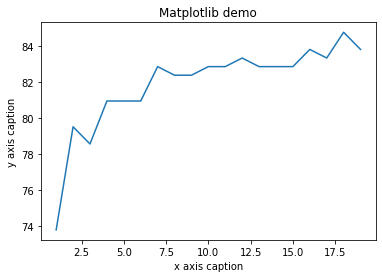

In [12]:
x = np.arange(1,20,1)
y = [accuracy_of_classifier(train,test,x) for x in x]
plt.title("Matplotlib demo") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x,y) 
plt.show()

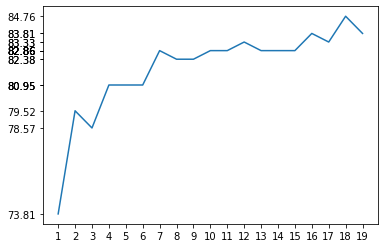

In [13]:
plt.xticks(x)
plt.yticks(y)
plt.plot(x,y) 
plt.show()